In [12]:
import numpy as np
import matplotlib.pyplot as plt
import time
class LinearRegresion():
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def fit(self, X, Y, visual=False, regularization=None, l=1):
        self.cof = np.zeros(X.shape[1]) if len(X.shape) > 1 else np.zeros(1)
        self.b = 0
        self.error = np.empty(0)

        fig = plt.figure(figsize=[1.5*6.4, 1.5*4.8])
        sub1 = fig.add_subplot(121)
        sub2 = fig.add_subplot(122)

        for i in range(self.iterations):
            self.error = np.append(self.error, self.loss(X,Y))
            if self.loss_der_numpy(X,Y,regularization=regularization,l=l) <= 0.001:
                break
            if visual:
                self.plot_results(sub1, sub2, X, Y)
                time.sleep(0.5)
        self.error = np.append(self.error, self.loss(X,Y))

        self.plot_results(sub1, sub2, X, Y)


    def predict(self, X):
        x = np.asarray(X)

        return [np.dot(x[i],self.cof)+self.b for i, _ in enumerate(x)]

    def loss_der_numpy(self, X, Y, regularization,l):
        x = np.asarray(X)
        y = np.asarray(Y)
        cof_der = np.zeros(X.shape[1]) if len(X.shape) > 1 else np.zeros(1)
        for i, x in enumerate(cof_der):
            if regularization=='l1':
                reg_term = self.cof[i]/abs(self.cof[i]) if self.cof[i]!= 0 else self.cof[i]
                cof_der[i] = np.sum(-2*(y-x*self.cof[i]-self.b)*x) + l*reg_term
            elif regularization=='l2':
                cof_der[i] = np.sum(-2*(y-x*self.cof[i]-self.b)*x) + 2*l*self.cof[i]
            elif regularization=='elastic':
                reg_term = self.cof[i]/abs(self.cof[i]) if self.cof[i]!= 0 else self.cof[i]
                cof_der[i] = np.sum(-2*(y-x*self.cof[i]-self.b)*x) + l*reg_term + 2*l*self.cof[i]
            else:
                cof_der[i] = np.sum(-2*(y-x*self.cof[i]-self.b)*x)

        b_der = np.sum(-2*(y - self.cof*x - self.b))

        for i, x in enumerate(self.cof) :self.cof[i] -= self.learning_rate*cof_der[i]
        self.b -= self.learning_rate*b_der

        return sum([self.learning_rate*abs(cof_der[i]+b_der) for i, x in enumerate(self.cof)])


    def plot_results(self, sub1, sub2, X, Y):
        sub1.cla()
        sub2.cla()
        
        sub1.title.set_text('Error')
        sub1.set_xlabel('Iterations')
        sub1.set_ylabel('Error')
        
        sub2.title.set_text('Model')
        sub2.set_xlabel('x')
        sub2.set_ylabel('y')
        
        
        sub1.plot(list(range(len(self.error))), self.error)
        sub1.set_ylim(bottom=0)
        
        x = np.linspace(X.min()-1, X.max()+1, 1000)
        y = self.predict(x)
        sub2.plot(x,y)
        sub2.plot(X, Y, linestyle="",marker="o")
        #sub2.set_ylim(top=10)

        sub1.figure.canvas.draw()

    def loss(self, X, Y):
        x = np.asarray(X)
        y = np.asarray(Y)
        return sum([(y - (np.dot(x[i],self.cof)-self.b))**2 for i, _ in enumerate(x)])

    def RMSE(self, X, Y):
        return np.sqrt(self.loss(X, Y))/len(X)

    def MAE(self, X, Y):
        x = np.asarray(X)
        y = np.asarray(Y)

        return sum([abs(y - (np.dot(x[i],self.cof)-self.b)) for i, _ in enumerate(x)])/len(X)

    def R2(self, X ,Y):
        x = np.asarray(X)
        y = np.asarray(Y)
        return np.sum((self.predict(x)-y.mean())**2)/np.sum((y-y.mean())**2)


In [13]:
experience = np.array([2.4,5.0,1.5,3.8,8.7,3.6,1.2,8.1,2.5,5,1.6,1.6,2.4,3.9,5.4])
salary = np.array([2.1,4.7,1.7,3.6,8.7,3.2,1.0,8.0,2.4,6,1.1,1.3,2.4,3.9,4.8])

# adding outliers
experience = np.append(experience, [1,2,3,4])
salary = np.append(salary,[9,10,11,12])

linreg = LinearRegresion(learning_rate=0.0001, iterations=1000)

[0.] 4.838260453704709


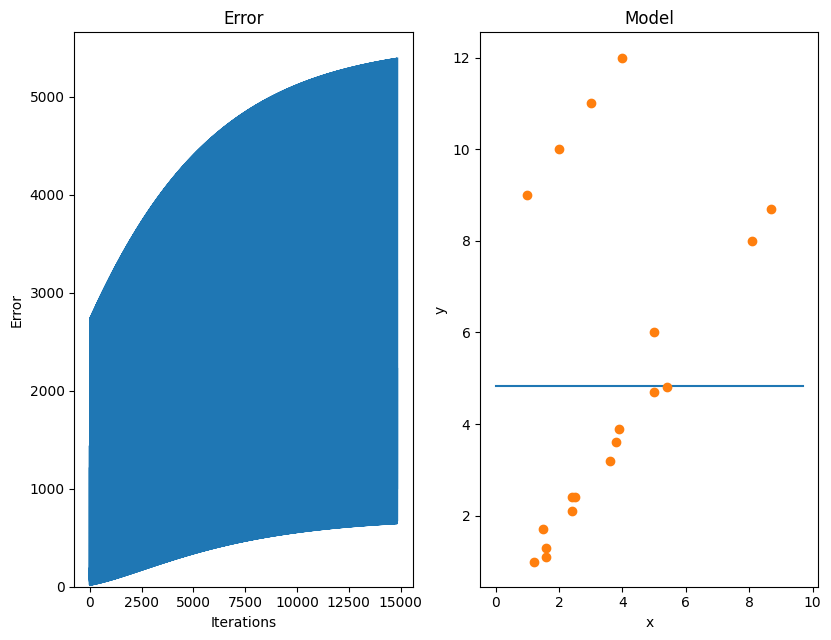

In [14]:
#%matplotlib notebook
# set visual=False to just get the result without plotting for every step
linreg.fit(experience, salary, visual=False)
print(linreg.cof, linreg.b)

In [15]:
print(f"Prediction (x, prediction for x)\n{list(zip(experience, linreg.predict(experience)))}")
print(f"RMSE={linreg.RMSE(experience, salary)}, MAE={linreg.MAE(experience, salary)}, R^2={linreg.R2(experience, salary)}")

Prediction (x, prediction for x)
[(2.4, array([4.83826045])), (5.0, array([4.83826045])), (1.5, array([4.83826045])), (3.8, array([4.83826045])), (8.7, array([4.83826045])), (3.6, array([4.83826045])), (1.2, array([4.83826045])), (8.1, array([4.83826045])), (2.5, array([4.83826045])), (5.0, array([4.83826045])), (1.6, array([4.83826045])), (1.6, array([4.83826045])), (2.4, array([4.83826045])), (3.9, array([4.83826045])), (5.4, array([4.83826045])), (1.0, array([4.83826045])), (2.0, array([4.83826045])), (3.0, array([4.83826045])), (4.0, array([4.83826045]))]
RMSE=[1.59174611 2.18822702 1.49997982 1.93586971 3.10588996 1.84410342
 1.33938881 2.94529894 1.66057083 2.48646748 1.36233038 1.40821353
 1.66057083 2.00469443 2.2111686  3.17471468 3.40413041 3.63354615
 3.86296188], MAE=[ 6.93826045  9.53826045  6.53826045  8.43826045 13.53826045  8.03826045
  5.83826045 12.83826045  7.23826045 10.83826045  5.93826045  6.13826045
  7.23826045  8.73826045  9.63826045 13.83826045 14.83826045 15.

## TASK 1

[0.] 4.838260453704709


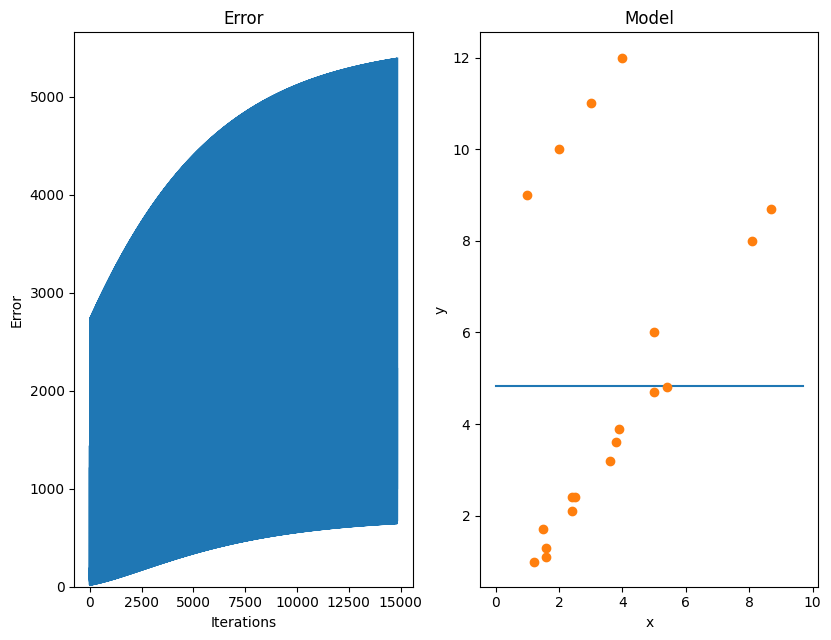

In [16]:
#%matplotlib notebook
# set visual=False to just get the result without plotting for every step
linreg_reg = LinearRegresion(learning_rate=0.0001, iterations=1000)
linreg_reg.fit(experience, salary, visual=False, regularization='l2')
print(linreg_reg.cof, linreg_reg.b)

## TASK 2

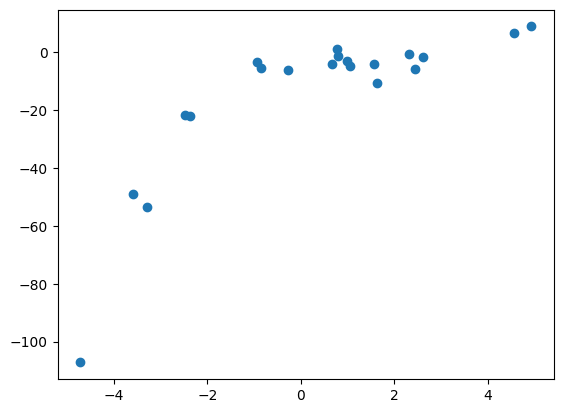

In [17]:
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)
plt.plot(x,y, linestyle='', marker='o')

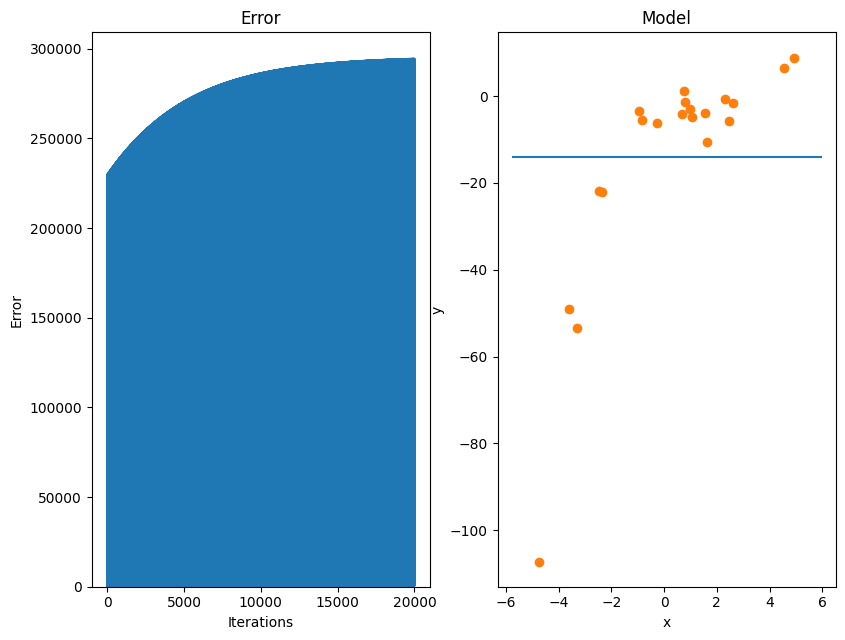

In [18]:
linreg = LinearRegresion(learning_rate=0.0001, iterations=1000)
linreg.fit(x, y, visual=False)